In [1]:
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import plot_roc_curve, RocCurveDisplay, plot_confusion_matrix, f1_score, roc_auc_score


In [17]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

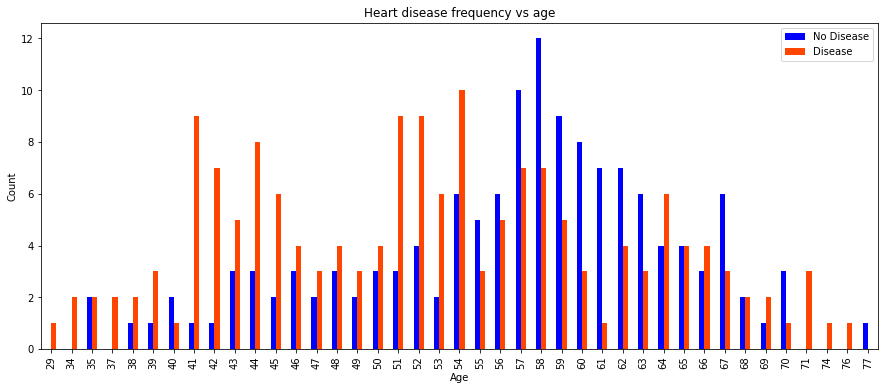

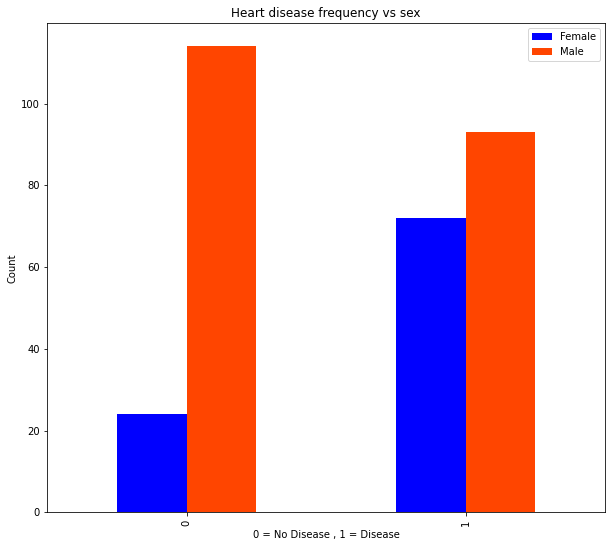

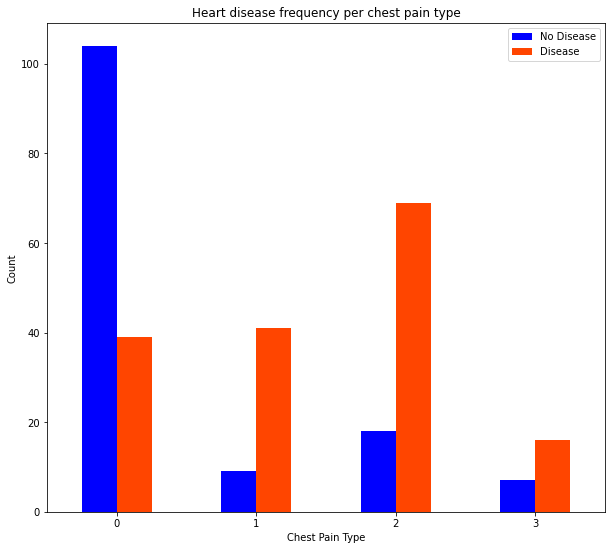

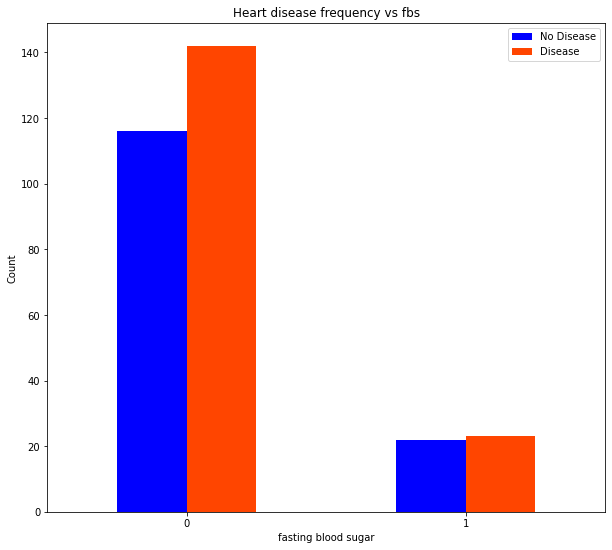

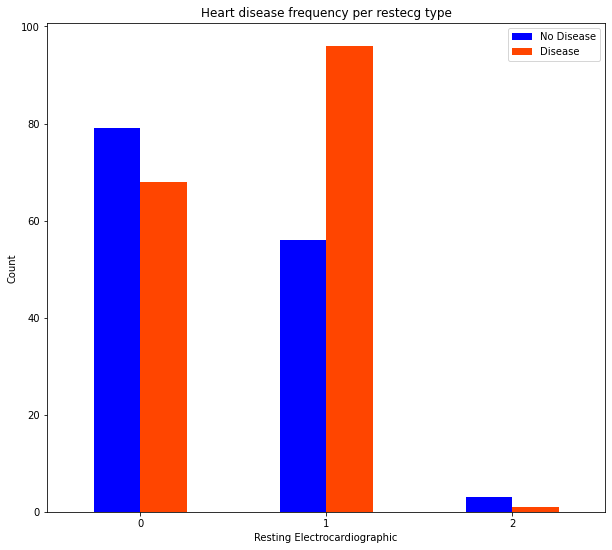

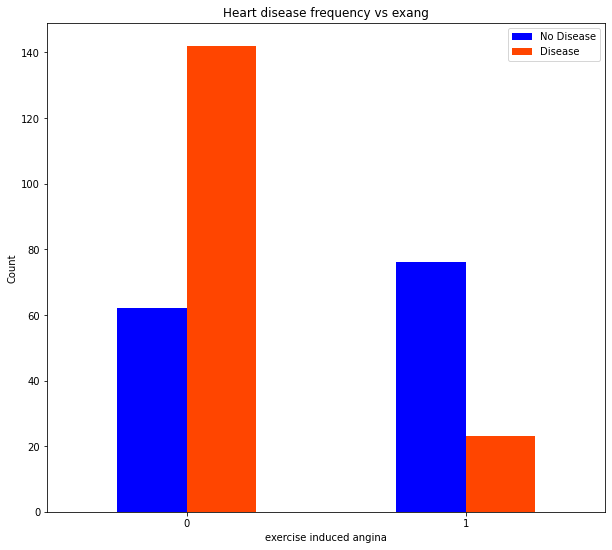

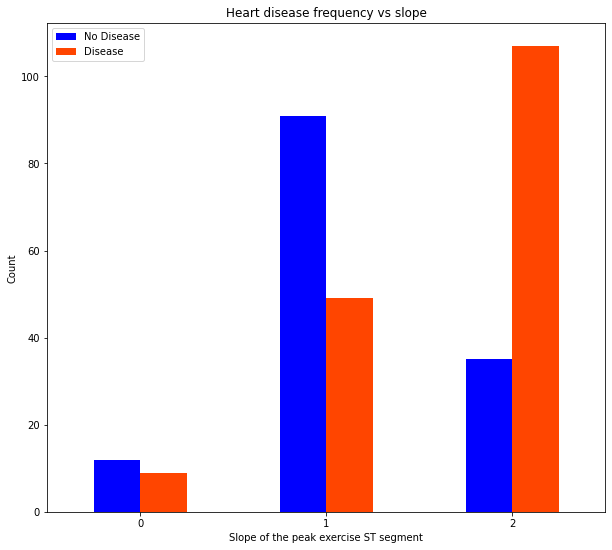

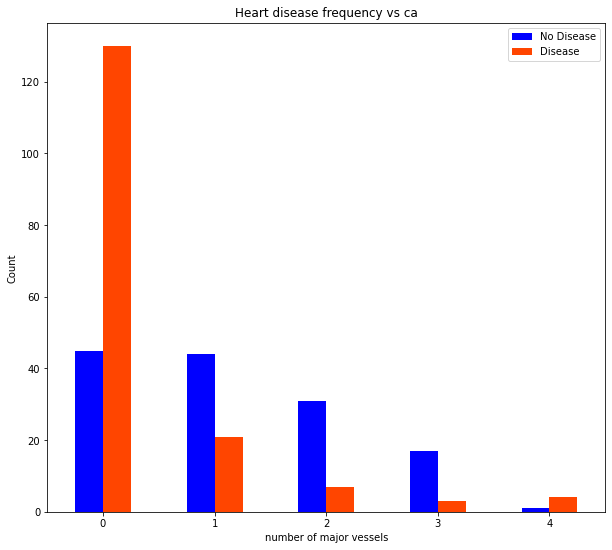

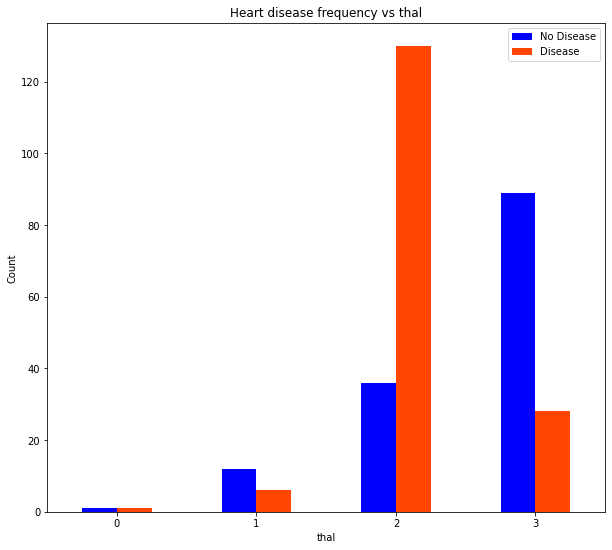

In [5]:
pd.crosstab(data.age, data.target).plot(figsize=(15,6), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

print("\n")
print("\n")

pd.crosstab(data.target, data.sex).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.show()
print("\n")
print("\n")


pd.crosstab(data.cp, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")

pd.crosstab(data.fbs, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs fbs")
plt.xlabel("fasting blood sugar") #(1 = true , 0 = false)
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")

pd.crosstab(data.restecg, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency per restecg type")
plt.xlabel("Resting Electrocardiographic")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")
pd.crosstab(data.exang, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs exang")
plt.xlabel("exercise induced angina")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")

pd.crosstab(data.slope, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs slope")
plt.xlabel("Slope of the peak exercise ST segment")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")

pd.crosstab(data.ca, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs ca")
plt.xlabel("number of major vessels")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")


pd.crosstab(data.thal, data.target).plot(figsize=(10,9), kind='bar', color=['blue','orangered'])
plt.title("Heart disease frequency vs thal")
plt.xlabel("thal")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.show()

print("\n")
print("\n")


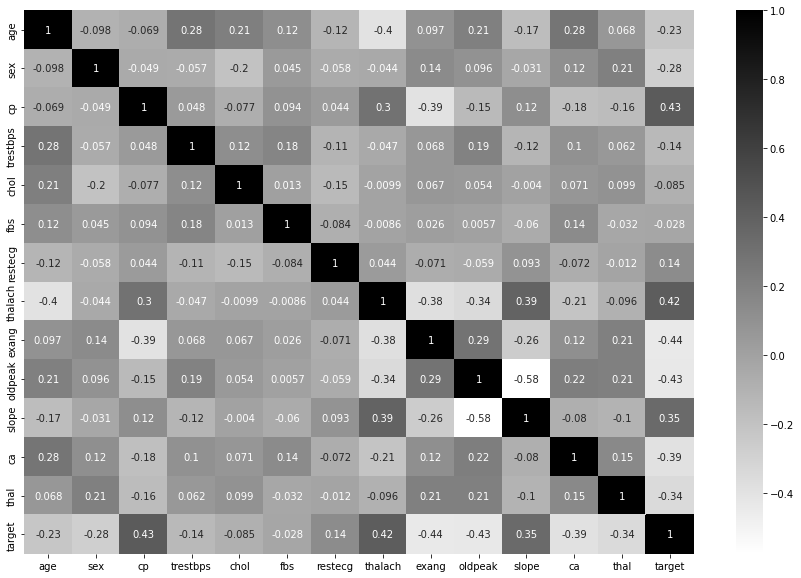

In [6]:
corr_map = data.corr()

plt.subplots(figsize=(15,10))
sns.heatmap(corr_map, annot=True, cmap='gray_r');

In [39]:
for column in data:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [33]:
x = data.iloc[:,:13]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=25)

sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [40]:
result = list()

              ------ Logistic Regression Model ------
                Training score : 0.861878453038674
                Testing score : 0.8524590163934426
**********************************************************************


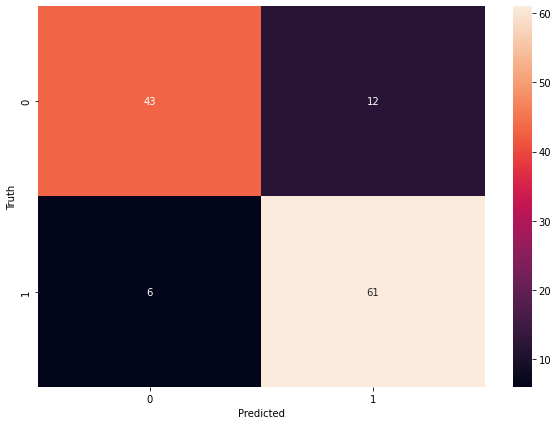

In [41]:
lr = LogisticRegression()
print('              ------ Logistic Regression Model ------')
lr.fit(X_train, y_train)
print(f'                Training score : {lr.score(X_train, y_train)}')
print(f'                Testing score : {lr.score(X_test, y_test)}')
y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(lr.score(X_test, y_test))
print('*' * 70)


              ------ K Nearest Neighbor Model ------
                Training score : 0.850828729281768
                Testing score : 0.8278688524590164
**********************************************************************


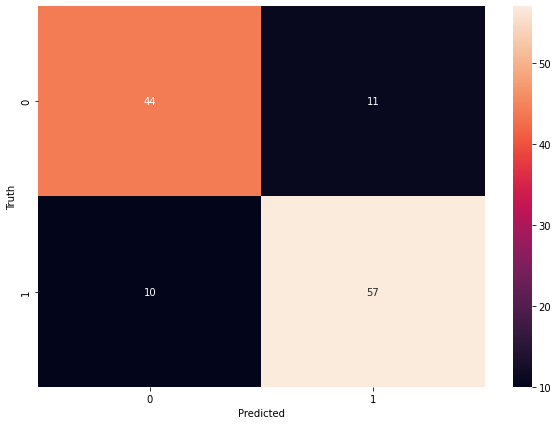

In [42]:
knn = KNeighborsClassifier()
print('              ------ K Nearest Neighbor Model ------')
knn.fit(X_train, y_train)
print(f'                Training score : {knn.score(X_train, y_train)}')
print(f'                Testing score : {knn.score(X_test, y_test)}')
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(knn.score(X_test, y_test))
print('*' * 70)


              ------ Random Forest Model ------
                Training score : 1.0
                Testing score : 0.8114754098360656
**********************************************************************


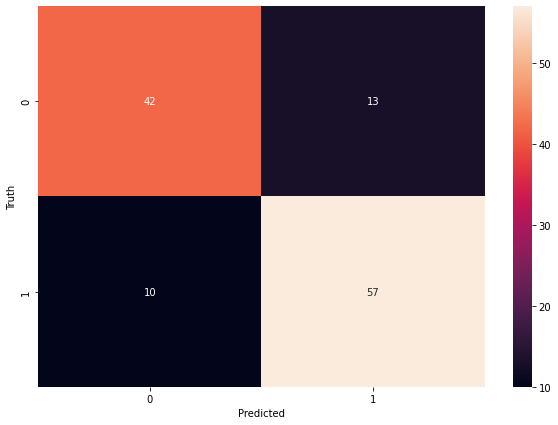

In [43]:
rf = RandomForestClassifier()
print('              ------ Random Forest Model ------')
rf.fit(X_train, y_train)
print(f'                Training score : {rf.score(X_train, y_train)}')
print(f'                Testing score : {rf.score(X_test, y_test)}')
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(rf.score(X_test, y_test))
print('*' * 70)


              ------ Support Vector Model ------
                Training score : 0.9226519337016574
                Testing score : 0.8114754098360656
**********************************************************************


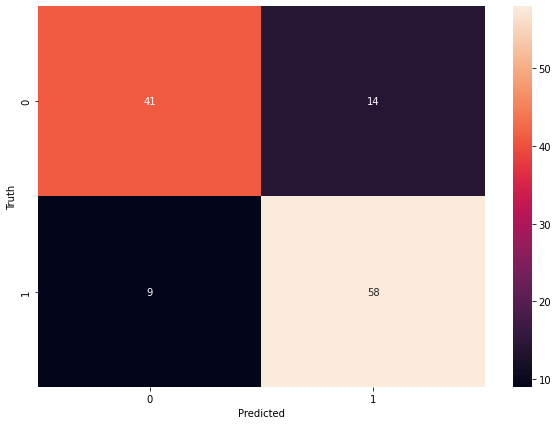

In [44]:
sv = SVC()
print('              ------ Support Vector Model ------')
sv.fit(X_train, y_train)
print(f'                Training score : {sv.score(X_train, y_train)}')
print(f'                Testing score : {sv.score(X_test, y_test)}')
y_pred = sv.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(sv.score(X_test, y_test))
print('*' * 70)


In [45]:
result

[0.8524590163934426,
 0.8278688524590164,
 0.8114754098360656,
 0.8114754098360656]

### Hyperparameter tuning for bestfeatures of Random Forest

In [47]:
rf_grid = {"bootstrap": [True],
           "max_depth" : [80, 90, 100, 110],
           "max_features": [2, 3],    
           "min_samples_leaf": [3, 4, 5],   
           "min_samples_split": [8, 10, 12],     
           "n_estimators": [100, 200, 300, 1000]}

gsc_rf = GridSearchCV(rf, param_grid=rf_grid, cv=5, verbose=True, n_jobs=-1)
gsc_rf.fit(X_train, y_train)

print(gsc_rf.best_params_)
print(gsc_rf.score(X_test, y_test))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.8524590163934426


In [46]:
lr_grid = {"solver":['liblinear','lbfgs'],"C": np.logspace(-1,1,30)}
gsc_lr = GridSearchCV(lr, param_grid=lr_grid, cv=5, verbose=True, n_jobs=-1)
gsc_lr.fit(X_train, y_train)

print(gsc_lr.best_params_)
print(gsc_lr.score(X_test, y_test))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.16102620275609392, 'solver': 'lbfgs'}
0.8688524590163934


In [48]:
rf_new_model = RandomForestClassifier(bootstrap=True, max_depth= 90, max_features=2, 
                                  min_samples_leaf=3, min_samples_split= 8, n_estimators=100)
lr_new_model = LogisticRegression(C = 0.16102620275609392,solver ='lbfgs' )

        ------ HyperTuned Logistic Regression Model ------
                Training score : 0.861878453038674
                Testing score : 0.8688524590163934
**********************************************************************


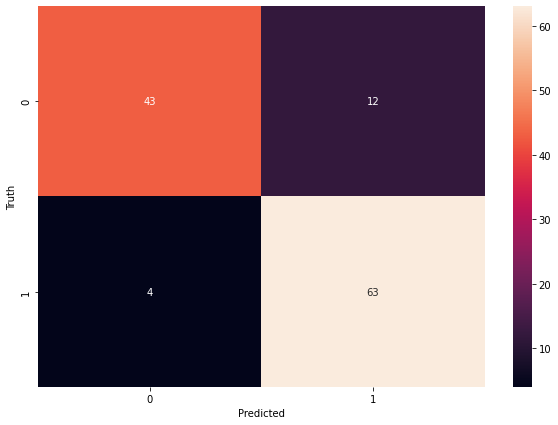

In [49]:
print('        ------ HyperTuned Logistic Regression Model ------')
lr_new_model.fit(X_train, y_train)
print(f'                Training score : {lr_new_model.score(X_train, y_train)}')
print(f'                Testing score : {lr_new_model.score(X_test, y_test)}')
y_pred = lr_new_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(lr_new_model.score(X_test, y_test))
print('*' * 70)

       ------ HyperTuned Random Forest Model ------
                Training score : 0.9171270718232044
                Testing score : 0.819672131147541
**********************************************************************


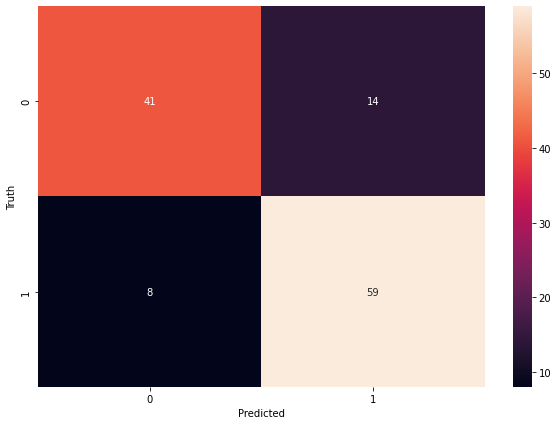

In [50]:
print('       ------ HyperTuned Random Forest Model ------')
rf_new_model.fit(X_train, y_train)
print(f'                Training score : {rf_new_model.score(X_train, y_train)}')
print(f'                Testing score : {rf_new_model.score(X_test, y_test)}')
y_pred = rf_new_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

result.append(rf_new_model.score(X_test, y_test))
print('*' * 70)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


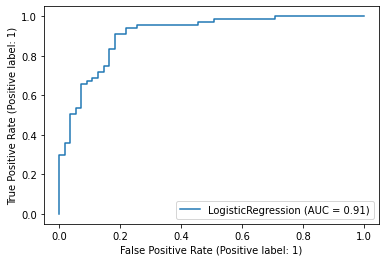

In [51]:
plot_roc_curve(lr_new_model, X_test, y_test);

In [52]:
y_pred = lr_new_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.78      0.84        55
           1       0.84      0.94      0.89        67

    accuracy                           0.87       122
   macro avg       0.88      0.86      0.87       122
weighted avg       0.87      0.87      0.87       122

